Text(0.5, 1.0, 't-SNE of Data into 2 Dimensions')

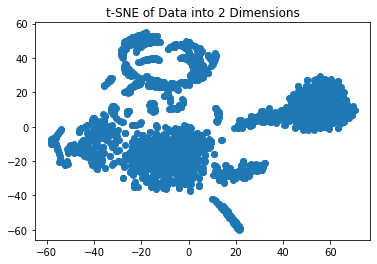

In [2]:
import pandas as pd

df = pd.read_excel(r"./../Data/RawData.xlsx")

import pandas as pd
from sklearn.preprocessing import StandardScaler

def tSNE(df):
    scale = StandardScaler().fit(df)

    df_scaled = scale.transform(df)

    #t-SNE code

    from sklearn.manifold import TSNE

    n_components = 2
    tsne = TSNE(n_components)
    tsne_result = tsne.fit_transform(df_scaled)
    return tsne_result

tsne_result = tSNE(df)

import matplotlib.pyplot as plt

plt.scatter(tsne_result[:,0], tsne_result[:,1])
plt.title("t-SNE of Data into 2 Dimensions")


In [ ]:
#placeholder

In [21]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
 

dbscan_model = DBSCAN(eps= 7.3).fit(tsne_result)
#i changed episilon until i got 4 clusters
dbscan_model.labels_

df['cluster'] = dbscan_model.labels_

df['cluster'].value_counts()


0    984
2    477
1    463
3     71
Name: cluster, dtype: int64

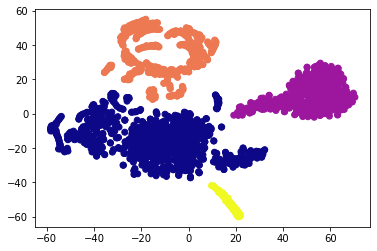

In [24]:
plt.scatter(tsne_result[:, 0], tsne_result[:,1], c = dbscan_model.labels_, cmap= "plasma")

 0    1953
 1      26
-1      10
 2       6
Name: cluster, dtype: int64

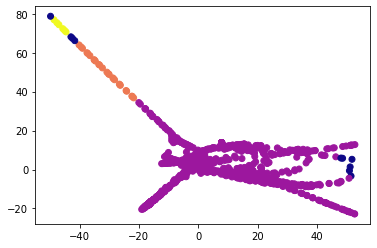

In [63]:
from sklearn.manifold import Isomap

scale = StandardScaler().fit(df)

df_scaled = scale.transform(df)

isomap = Isomap(n_components=2)
isomap_result = isomap.fit_transform(df_scaled)

dbscan_model = DBSCAN(eps= 3.76).fit(isomap_result)
#i changed episilon until i got 4 clusters
dbscan_model.labels_

df['cluster'] = dbscan_model.labels_


plt.scatter(isomap_result[:, 0], isomap_result[:,1], c = dbscan_model.labels_, cmap= "plasma")

df['cluster'].value_counts()
